In [2]:
# Setup
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os
import sys
root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from src.data_loader import DataLoader as DL
from src.coach import train_in_batches

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%time
dl = DL()
clf_batches = MLPClassifier(hidden_layer_sizes=(128,))
no_steps = 1000
batch_size = 10
results = []
test_x, test_y = dl.load_random_test_data(sample_size=1, return_1d=True)
clf_batches.partial_fit(test_x, test_y, dl.get_classes())

test_x, test_y = dl.load_random_test_data(sample_size=60, return_1d=True)
r = clf_batches.score(test_x, test_y)
results.append(1-r)

for i in range(no_steps):
    data, labels = dl.get_next_training_set(batch_size=batch_size)
    clf_batches.partial_fit(data, labels, dl.classes)
    
    r = clf_batches.score(test_x, test_y)
    results.append(1-r)

# Get random test data
test_x, test_y = dl.load_random_test_data(sample_size=300, return_1d=True)
clf_batches.score(test_x, test_y) 

# Save model
pickle.dump(clf_batches, open(dl.model_save_path, 'wb'))

Wall time: 1h 23min 29s


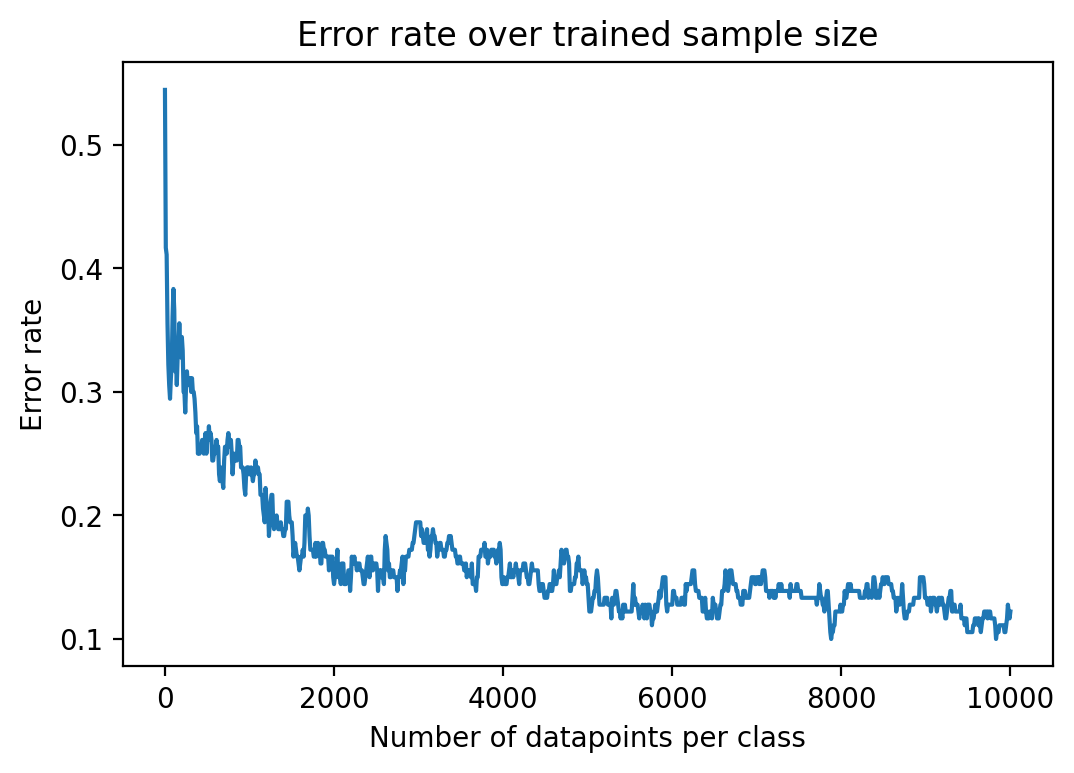

In [4]:
# Plot learning progress
start = 1
step = batch_size
no_steps = no_steps
index = np.linspace(start, start+(step*no_steps), int((step*no_steps/step)+start))
data = pd.DataFrame(data=results, index=index)
fig, ax = plt.subplots(1, 1, dpi=200)
ax.set_title('Error rate over trained sample size')
ax.set_xlabel('Number of datapoints per class')
ax.set_ylabel('Error rate')
ax.plot(data)

In [5]:
test_x, test_y = dl.load_random_test_data(sample_size=1000, return_1d=True)
clf_batches.score(test_x, test_y)

0.9133333333333333